In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
file_path = 'gold_based_merged_filled_20250703_113946.csv'
df = pd.read_csv(file_path, parse_dates=['tanggal'], index_col='tanggal')

In [8]:
df.rename(columns={
    'close_rate': 'close_rate_fed',
    'open_rate': 'open_rate_fed',
    'high_rate': 'high_rate_fed',
    'low_rate': 'low_rate_fed',
    'close_index': 'close_index_jsec',
    'open_index': 'open_index_jsec',
    'high_index': 'high_index_jsec',
    'low_index': 'low_index_jsec',
}, inplace=True)

In [9]:
df

,usd_per_ounce,kurs_dollar_per_ounce,idr_per_ounce,usd_per_gram,kurs_dollar_per_gram,idr_per_gram,WTI_Price_USD,inflation_rate,close_rate_fed,open_rate_fed,high_rate_fed,low_rate_fed,volume_billion_x,change_percent_x,close_index_jsec,open_index_jsec,high_index_jsec,low_index_jsec,volume_billion_y,change_percent_y
tanggal,,,,,,,,,,,,,,,,,,,,
2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,61.17,2.680000,1.55,1.55,1.55,1.55,0,0.0,6283.58,6313.13,6317.01,6263.68,0.000000e+00,-0.250000
2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,61.17,2.689677,1.55,1.55,1.55,1.55,0,0.0,6283.58,6313.13,6317.01,6263.68,3.300000e+09,-0.250000
2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,63.00,2.699355,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.460000e+09,0.630000
2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.709032,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.353333e+09,0.073333
2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.718710,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.246667e+09,-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,2911.17,16315.00,47495739,93.60,16315.00,1527023,67.29,1.030000,4.33,4.33,4.33,4.33,0,0.0,6636.00,6631.31,6682.94,6577.83,1.685333e+10,-0.290000
2025-03-10,2898.61,16336.00,47351693,93.19,16336.00,1522392,66.31,1.030000,4.33,4.33,4.33,4.33,0,0.0,6598.21,6618.92,6629.44,6568.13,1.536000e+10,-0.570000
2025-03-11,2916.73,16326.00,47618534,93.78,16326.00,1530971,66.52,1.030000,4.33,4.33,4.33,4.33,0,0.0,6545.85,6535.87,6567.58,6499.04,1.500000e+10,-0.790000


In [10]:
kolom_dihapus = ['volume_billion_x', 'change_percent_x', 'volume_billion_y', 'change_percent_y']
df.drop(kolom_dihapus, axis=1, inplace=True)


In [11]:
df

,usd_per_ounce,kurs_dollar_per_ounce,idr_per_ounce,usd_per_gram,kurs_dollar_per_gram,idr_per_gram,WTI_Price_USD,inflation_rate,close_rate_fed,open_rate_fed,high_rate_fed,low_rate_fed,close_index_jsec,open_index_jsec,high_index_jsec,low_index_jsec
tanggal,,,,,,,,,,,,,,,,
2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,61.17,2.680000,1.55,1.55,1.55,1.55,6283.58,6313.13,6317.01,6263.68
2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,61.17,2.689677,1.55,1.55,1.55,1.55,6283.58,6313.13,6317.01,6263.68
2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,63.00,2.699355,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.709032,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.718710,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,2911.17,16315.00,47495739,93.60,16315.00,1527023,67.29,1.030000,4.33,4.33,4.33,4.33,6636.00,6631.31,6682.94,6577.83
2025-03-10,2898.61,16336.00,47351693,93.19,16336.00,1522392,66.31,1.030000,4.33,4.33,4.33,4.33,6598.21,6618.92,6629.44,6568.13
2025-03-11,2916.73,16326.00,47618534,93.78,16326.00,1530971,66.52,1.030000,4.33,4.33,4.33,4.33,6545.85,6535.87,6567.58,6499.04


In [22]:
df.to_csv('gold_based_merged_filled_20250703_113946_final.csv', index=True)

In [21]:
df.rename(columns={
    'WTI_Price_USD': 'world_oil_price_USD',
}, inplace=True)

In [16]:
df

,usd_per_ounce,kurs_dollar_per_ounce,idr_per_ounce,usd_per_gram,kurs_dollar_per_gram,idr_per_gram,WTI_Price_USD,inflation_rate,close_rate_fed,open_rate_fed,high_rate_fed,low_rate_fed,close_index_jsec,open_index_jsec,high_index_jsec,low_index_jsec
tanggal,,,,,,,,,,,,,,,,
2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,61.17,2.680000,1.55,1.55,1.55,1.55,6283.58,6313.13,6317.01,6263.68
2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,61.17,2.689677,1.55,1.55,1.55,1.55,6283.58,6313.13,6317.01,6263.68
2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,63.00,2.699355,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.709032,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.718710,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,2911.17,16315.00,47495739,93.60,16315.00,1527023,67.29,1.030000,4.33,4.33,4.33,4.33,6636.00,6631.31,6682.94,6577.83
2025-03-10,2898.61,16336.00,47351693,93.19,16336.00,1522392,66.31,1.030000,4.33,4.33,4.33,4.33,6598.21,6618.92,6629.44,6568.13
2025-03-11,2916.73,16326.00,47618534,93.78,16326.00,1530971,66.52,1.030000,4.33,4.33,4.33,4.33,6545.85,6535.87,6567.58,6499.04


In [23]:
df.shape

(1899, 16)

In [20]:
file_path_old = 'gold_based_merged_filled_20250703_113946.csv'
df_old = pd.read_csv(file_path_old, parse_dates=['tanggal'], index_col='tanggal')
df_old

,usd_per_ounce,kurs_dollar_per_ounce,idr_per_ounce,usd_per_gram,kurs_dollar_per_gram,idr_per_gram,WTI_Price_USD,inflation_rate,close_rate,open_rate,high_rate,low_rate,volume_billion_x,change_percent_x,close_index,open_index,high_index,low_index,volume_billion_y,change_percent_y
tanggal,,,,,,,,,,,,,,,,,,,,
2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,61.17,2.680000,1.55,1.55,1.55,1.55,0,0.0,6283.58,6313.13,6317.01,6263.68,0.000000e+00,-0.250000
2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,61.17,2.689677,1.55,1.55,1.55,1.55,0,0.0,6283.58,6313.13,6317.01,6263.68,3.300000e+09,-0.250000
2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,63.00,2.699355,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.460000e+09,0.630000
2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.709032,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.353333e+09,0.073333
2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.718710,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.246667e+09,-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,2911.17,16315.00,47495739,93.60,16315.00,1527023,67.29,1.030000,4.33,4.33,4.33,4.33,0,0.0,6636.00,6631.31,6682.94,6577.83,1.685333e+10,-0.290000
2025-03-10,2898.61,16336.00,47351693,93.19,16336.00,1522392,66.31,1.030000,4.33,4.33,4.33,4.33,0,0.0,6598.21,6618.92,6629.44,6568.13,1.536000e+10,-0.570000
2025-03-11,2916.73,16326.00,47618534,93.78,16326.00,1530971,66.52,1.030000,4.33,4.33,4.33,4.33,0,0.0,6545.85,6535.87,6567.58,6499.04,1.500000e+10,-0.790000


Liniear regresion Test

In [24]:
selected_columns = ['kurs_dollar_per_gram', 'inflation_rate', 'world_oil_price_USD', 'open_rate_fed', 'close_rate_fed', 'open_index_jsec']
X = df[selected_columns]
y = df['idr_per_gram']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n✅ Data dibagi menjadi {len(X_train)} data training dan {len(X_test)} data testing.")


✅ Data dibagi menjadi 1519 data training dan 380 data testing.


In [26]:
print("\n🧠 Melatih model Linear Regression...")
model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Model selesai dilatih!")


🧠 Melatih model Linear Regression...
✅ Model selesai dilatih!


In [27]:
print("\n--- 📊 Hasil Evaluasi ---")
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)



--- 📊 Hasil Evaluasi ---


In [28]:
print(f"Mean Absolute Error (MAE): ${mae:.2f}")

Mean Absolute Error (MAE): $60268.21


In [30]:
print(f"Skor R-squared (R²): {r2_linear:.2%}")

Skor R-squared (R²): 85.13%


In [31]:
print(y_pred)

[ 987835.69561435  910647.82284768  894473.72698002  864934.85835067
 1024945.83223857  892561.5973488   670008.46704851  878754.9243219
 1033580.26081786  897115.47724911 1171681.80408125 1129742.46172731
  802384.25861689  791935.97727086  816652.34443137 1379537.62272993
  890223.56392221 1023341.22780404  926872.63934536 1067421.32995949
 1016519.14462525  805792.99744916 1269309.98445799  857701.41714749
 1443541.74962826  939739.95542216  757680.434833   1308313.45108724
  973774.77853923  906806.9217006   975988.18612883 1270315.13046659
 1262640.35831121  961111.54895987 1419081.36858046  995541.34813878
  873761.13943047  763574.61170996  858179.81375593  815981.21096436
  813258.73938736  766304.69991831  881374.97383929  975042.06856224
 1176459.98693468  921056.65824324  842116.89896998  962310.87053183
 1004117.9754592  1101860.7470723   978834.54132021  846390.66353895
  787904.05583305  911369.72356508  885263.28621773  859530.17441285
  868564.83248053  836717.16547502 

In [33]:
# Buat DataFrame baru untuk perbandingan
hasil_prediksi = pd.DataFrame({
    'Harga Asli': y_test,
    'Harga Prediksi': y_pred
})

# Tambah kolom 'Selisih' untuk liat perbedaannya
hasil_prediksi['Selisih'] = hasil_prediksi['Harga Asli'] - hasil_prediksi['Harga Prediksi']

# Tampilkan 10 baris pertama dari tabel perbandingan
print("\n--- 🧐 Perbandingan Hasil Prediksi vs Harga Asli ---")
print(hasil_prediksi.head(10))


--- 🧐 Perbandingan Hasil Prediksi vs Harga Asli ---
            Harga Asli  Harga Prediksi        Selisih
tanggal                                              
2023-05-07      922442    9.878357e+05  -65393.695614
2020-04-21      842858    9.106478e+05  -67789.822848
2021-07-08      838160    8.944737e+05  -56313.726980
2021-06-10      868234    8.649349e+05    3299.141649
2023-08-03      922442    1.024946e+06 -102503.832239
2023-01-05      922442    8.925616e+05   29880.402651
2020-03-11      757050    6.700085e+05   87041.532951
2020-09-08      921562    8.787549e+05   42807.075678
2023-08-07      922442    1.033580e+06 -111138.260818
2022-10-26      836643    8.971155e+05  -60472.477249


In [27]:
skenario_netral = {
    'kurs_dollar_per_gram': 71.0,  
    'inflation_rate': 2.9,
    'WTI_Price_USD': 67.0,
    'open_rate': 4.25,
    'close_rate': 4.25
}


In [28]:
selected_columns = ['kurs_dollar_per_gram', 'inflation_rate', 'WTI_Price_USD', 'open_rate', 'close_rate']
data_prediksi = pd.DataFrame([skenario_netral], columns=selected_columns)
print(data_prediksi)

   kurs_dollar_per_gram  inflation_rate  WTI_Price_USD  open_rate  close_rate
0                  71.0             2.9           67.0       4.25        4.25


In [29]:
prediksi_netral = model.predict(data_prediksi)

In [30]:
print(f"Prediksi harga emas di Des 2025 adalah: Rp {prediksi_netral[0]:,.0f} per gram")

Prediksi harga emas di Des 2025 adalah: Rp -1,405,361 per gram


memakai random forest agar lebih akurat

In [34]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_model.fit(X_train, y_train)
print("Model selesai dilatih! 🌲🌳🌲")

Model selesai dilatih! 🌲🌳🌲


In [36]:
print("\n--- Hasil Evaluasi Random Forest ---")
y_pred_forest = forest_model.predict(X_test)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Mean Absolute Error (MAE): Rp{mae_forest:.2f}")
print(f"Skor R-squared (R²): {r2_forest:.2%}")


--- Hasil Evaluasi Random Forest ---
Mean Absolute Error (MAE): Rp7321.34
Skor R-squared (R²): 99.21%


In [37]:
print("\n================ Perbandingan ================")
print(f"R² Linear Regression: {r2_linear:.2%}")
print(f"R² Random Forest    : {r2_forest:.2%}")
print("============================================")


================ Perbandingan ================
R² Linear Regression: 85.13%
R² Random Forest    : 99.21%


In [41]:
skenario_netral = {
    'kurs_dollar_per_gram': 71.0,
    'inflation_rate': 2.9,
    'world_oil_price_USD': 67.0,
    'open_rate_fed': 4.25,
    'close_rate_fed': 4.25, 
    'open_index_jsec': 6289.0, 
    'close_rate_fed': 6134.0, 
}
data_prediksi = pd.DataFrame([skenario_netral], columns=selected_columns)


In [42]:
prediksi_rf = forest_model.predict(data_prediksi)

In [43]:
print(f"\n--- 🚀 Hasil Prediksi dengan Random Forest ---")
print(f"Prediksi harga emas di Des 2025 adalah: Rp {prediksi_rf[0]:,.0f} per gram")


--- 🚀 Hasil Prediksi dengan Random Forest ---
Prediksi harga emas di Des 2025 adalah: Rp 909,208 per gram


Make another model use LSTM

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
file_path = 'gold_based_merged_filled_20250703_113946_final.csv'
df = pd.read_csv(file_path, parse_dates=['tanggal'], index_col='tanggal')

In [4]:
price_data = df['idr_per_gram'].values.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price_data)

print("--- Data berhasil di-scaling ---")

--- Data berhasil di-scaling ---


In [6]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

In [7]:
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"--- Sequences dibuat dengan shape X: {X.shape} dan y: {y.shape} ---")

--- Sequences dibuat dengan shape X: (1839, 60, 1) dan y: (1839,) ---


In [8]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"--- Data di-split: {len(X_train)} train, {len(X_test)} test ---")

--- Data di-split: 1471 train, 368 test ---


In [9]:
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().reshape(-1, 1)
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float().reshape(-1, 1)

In [10]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

print("--- Blueprint model LSTM siap ---")


--- Blueprint model LSTM siap ---


In [11]:
model = LSTMModel()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50 # Lo bisa naikin epochs kalo mau training lebih lama
print("--- Mulai training... Sabar ya, ini butuh waktu hehe ---")

for i in range(epochs):
    model.train() # Set model ke mode training
    optimizer.zero_grad()
    
    y_pred = model(X_train_tensor)
    
    loss = loss_function(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0:
        print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.6f}")

print("--- Training selesai! ---")


--- Mulai training... Sabar ya, ini butuh waktu hehe ---
Epoch [10/50], Loss: 0.005937
Epoch [20/50], Loss: 0.005776
Epoch [30/50], Loss: 0.005425
Epoch [40/50], Loss: 0.004891
Epoch [50/50], Loss: 0.004893
--- Training selesai! ---


In [12]:
model.eval() # Set model ke mode evaluasi (penting!)

with torch.no_grad(): # Ga perlu hitung gradien pas prediksi
    test_predictions_scaled = model(X_test_tensor)


In [13]:
# Balikin hasil prediksi dari skala 0-1 ke harga Rupiah asli
test_predictions = scaler.inverse_transform(test_predictions_scaled.numpy())
# Balikin juga y_test asli buat perbandingan
y_test_real = scaler.inverse_transform(y_test_tensor.numpy())

print("--- Prediksi di data test selesai ---")

--- Prediksi di data test selesai ---


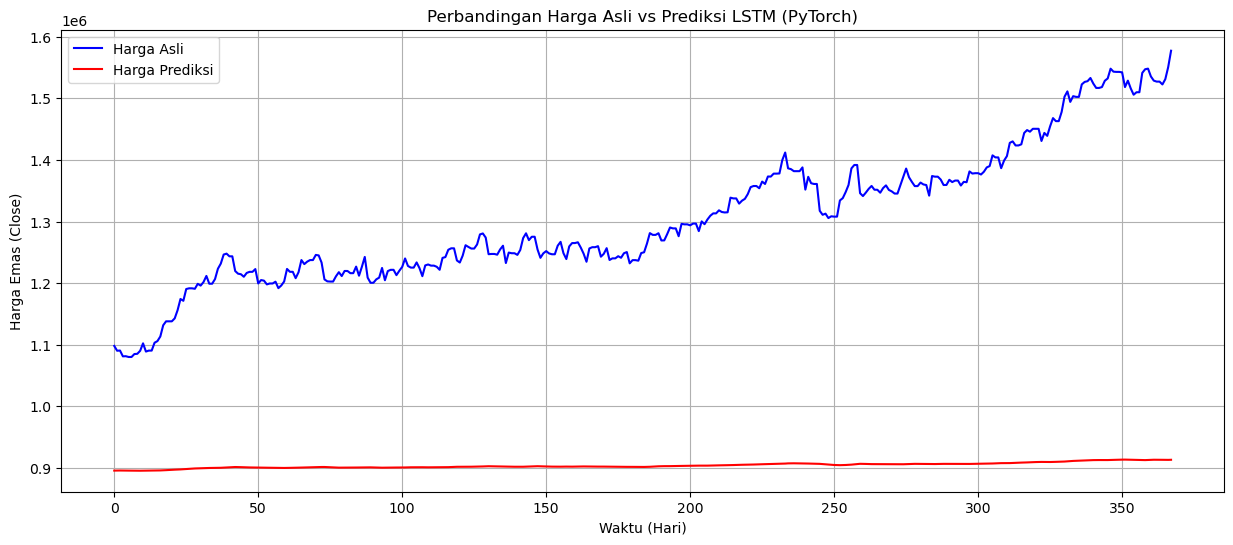

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_real, color='blue', label='Harga Asli')
plt.plot(test_predictions, color='red', label='Harga Prediksi')
plt.title('Perbandingan Harga Asli vs Prediksi LSTM (PyTorch)')
plt.xlabel('Waktu (Hari)')
plt.ylabel('Harga Emas (Close)')
plt.legend()
plt.grid(True)
plt.show()

Multivariat LSTM

In [16]:
features = ['idr_per_gram', 'kurs_dollar_per_ounce', 'world_oil_price_USD', 'inflation_rate', 'open_rate_fed', 'close_rate_fed', 'open_index_jsec', 'close_index_jsec'] 
n_features = len(features)

In [17]:
data = df[features].values


In [19]:
# --- 2. SCALING DATA (0 sampai 1) ---
# === PERUBAHAN DI SINI ===
# Scaler sekarang belajar dari SEMUA fitur, bukan cuma 'Close'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
print(f"--- Data berhasil di-scaling untuk {n_features} fitur ---")

--- Data berhasil di-scaling untuk 8 fitur ---


In [20]:

# --- 3. MEMBUAT SEQUENCES ---
# === PERUBAHAN DI SINI ===
def create_sequences_multi(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        # X sekarang berisi semua fitur selama time_step
        X.append(data[i:(i + time_step), :]) 
        # y tetep cuma harga 'Close' (kolom ke-0)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences_multi(scaled_data, time_step)

# X udah 3D, jadi ga perlu di-reshape lagi
print(f"--- Sequences dibuat dengan shape X: {X.shape} dan y: {y.shape} ---")

--- Sequences dibuat dengan shape X: (1839, 60, 8) dan y: (1839,) ---


In [21]:
# --- 4. SPLIT DATA: TRAIN & TEST ---
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"--- Data di-split: {len(X_train)} train, {len(X_test)} test ---")

--- Data di-split: 1471 train, 368 test ---


In [22]:
# --- 5. CONVERT KE PYTORCH TENSOR ---
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().reshape(-1, 1)
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float().reshape(-1, 1)

In [23]:
# --- 6. DEFINISIKAN MODEL LSTM ---
# === PERUBAHAN DI SINI ===
# Kita perlu kasih tau modelnya ukuran inputnya sekarang bukan 1, tapi n_features
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Inisialisasi hidden state (ga perlu diubah)
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel(input_size=n_features) # <-- Ukuran input disesuain di sini
print(f"--- Blueprint model LSTM siap untuk {n_features} fitur ---")

--- Blueprint model LSTM siap untuk 8 fitur ---


In [24]:
# --- 7. INISIALISASI & TRAINING LOOP ---
# Bagian ini sama persis kayak sebelumnya
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50 
print("--- Mulai training model multivariate... ---")

for i in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    y_pred = model(X_train_tensor)
    
    loss = loss_function(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0:
        print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.6f}")

print("--- Training selesai! ---")

--- Mulai training model multivariate... ---
Epoch [10/50], Loss: 0.006857
Epoch [20/50], Loss: 0.003591
Epoch [30/50], Loss: 0.002613
Epoch [40/50], Loss: 0.002422
Epoch [50/50], Loss: 0.002192
--- Training selesai! ---


In [27]:
# --- 8. EVALUASI & PREDIKSI ---
model.eval()
with torch.no_grad():
    test_predictions_scaled = model(X_test_tensor)

# === PERUBAHAN BESAR DI SINI (TRIK INVERSE TRANSFORM) ===
# Scaler kita dilatih pake `n_features` kolom, jadi input buat inverse_transform
# juga harus punya `n_features` kolom.
# Kita bikin "dummy" array sebesar `n_features` kolom,
# terus isi kolom pertama dengan hasil prediksi kita.

# Buat dummy array untuk prediksi
dummy_predictions = np.zeros((len(test_predictions_scaled), n_features))
dummy_predictions[:, 0] = test_predictions_scaled.flatten().numpy()
# Inverse transform si dummy array
test_predictions = scaler.inverse_transform(dummy_predictions)[:, 0]

# Lakuin hal yang sama buat y_test
dummy_y_test = np.zeros((len(y_test_tensor), n_features))
dummy_y_test[:, 0] = y_test_tensor.flatten().numpy()
y_test_real = scaler.inverse_transform(dummy_y_test)[:, 0]

print("--- Prediksi di data test selesai & dikembalikan ke Rupiah ---")


--- Prediksi di data test selesai & dikembalikan ke Rupiah ---


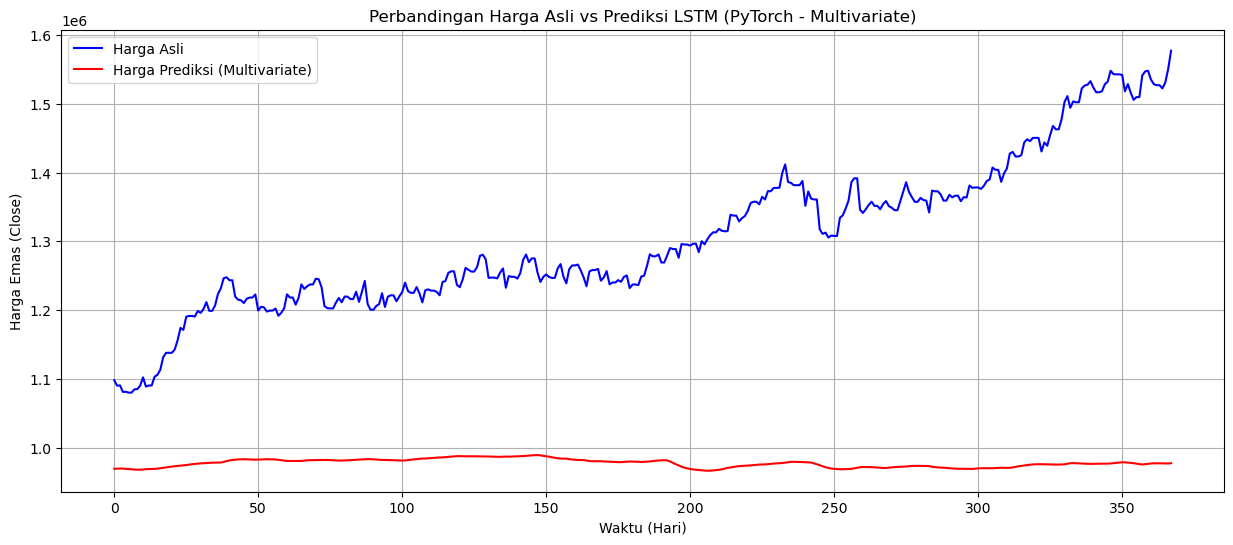

In [28]:
# --- 9. VISUALISASI HASIL ---
# Sama persis, ga ada yang diubah
plt.figure(figsize=(15, 6))
plt.plot(y_test_real, color='blue', label='Harga Asli')
plt.plot(test_predictions, color='red', label='Harga Prediksi (Multivariate)')
plt.title('Perbandingan Harga Asli vs Prediksi LSTM (PyTorch - Multivariate)')
plt.xlabel('Waktu (Hari)')
plt.ylabel('Harga Emas (Close)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# --- 4. SPLIT DATA: TRAIN, VALIDATION, & TEST ---
# === PERUBAHAN DI SINI ===

# Pertama, pisahin dulu data test (20% terakhir)
train_val_size = int(len(X) * 0.8)
X_train_val, X_test = X[:train_val_size], X[train_val_size:]
y_train_val, y_test = y[:train_val_size], y[train_val_size:]

# Kedua, dari data train_val, pisahin lagi jadi train baru & validation
# Misal, 20% dari data train_val dijadiin validation set
# shuffle=False itu WAJIB buat data time series!
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=False
)

print(f"--- Data di-split: {len(X_train)} train, {len(X_val)} validation, {len(X_test)} test ---")

--- Data di-split: 1176 train, 295 validation, 368 test ---


In [30]:
# --- 5. CONVERT KE PYTORCH TENSOR ---
# === PERUBAHAN DI SINI ===
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().reshape(-1, 1)
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float().reshape(-1, 1)
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float().reshape(-1, 1)



In [31]:
# --- 6. DEFINISIKAN MODEL LSTM ---
# Sama persis, ga ada yang diubah
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel(input_size=n_features)


In [35]:
# --- 7. TRAINING LOOP DENGAN VALIDASI ---
# === PERUBAHAN DI SINI ===
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 20 # Kita bisa set lebih banyak karena nanti bisa pake early stopping
# Siapin list kosong buat nyimpen loss
train_losses = []
val_losses = []

print("--- Mulai training dengan validasi... ---")

for i in range(epochs):
    # --- Training Phase ---
    model.train()
    optimizer.zero_grad()
    y_pred_train = model(X_train_tensor)
    loss_train = loss_function(y_pred_train, y_train_tensor)
    loss_train.backward()
    optimizer.step()
    
    # --- Validation Phase ---
    model.eval() # Set model ke mode evaluasi
    with torch.no_grad(): # Ga perlu itung gradien
        y_pred_val = model(X_val_tensor)
        loss_val = loss_function(y_pred_val, y_val_tensor)
    
    # Simpen loss tiap epoch
    train_losses.append(loss_train.item())
    val_losses.append(loss_val.item())
    
    if (i + 1) % 10 == 0:
        print(f"Epoch [{i+1}/{epochs}], Train Loss: {loss_train.item():.6f}, Val Loss: {loss_val.item():.6f}")

print("--- Training selesai! ---")


--- Mulai training dengan validasi... ---
Epoch [10/20], Train Loss: 0.001876, Val Loss: 0.006318
Epoch [20/20], Train Loss: 0.001581, Val Loss: 0.004991
--- Training selesai! ---


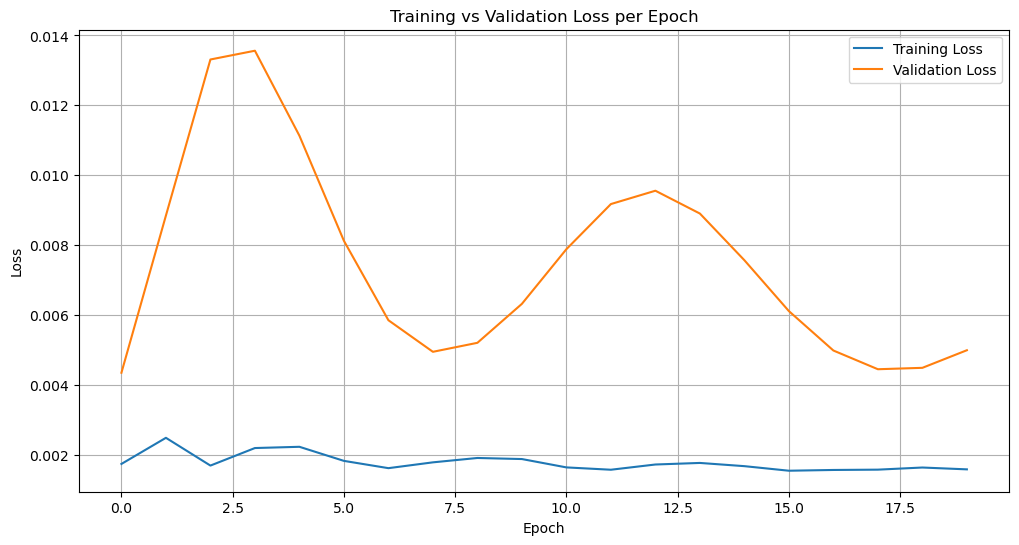

In [36]:
# --- 8. PLOT HASIL TRAINING & VALIDATION LOSS ---
# === BAGIAN BARU DI SINI ===
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


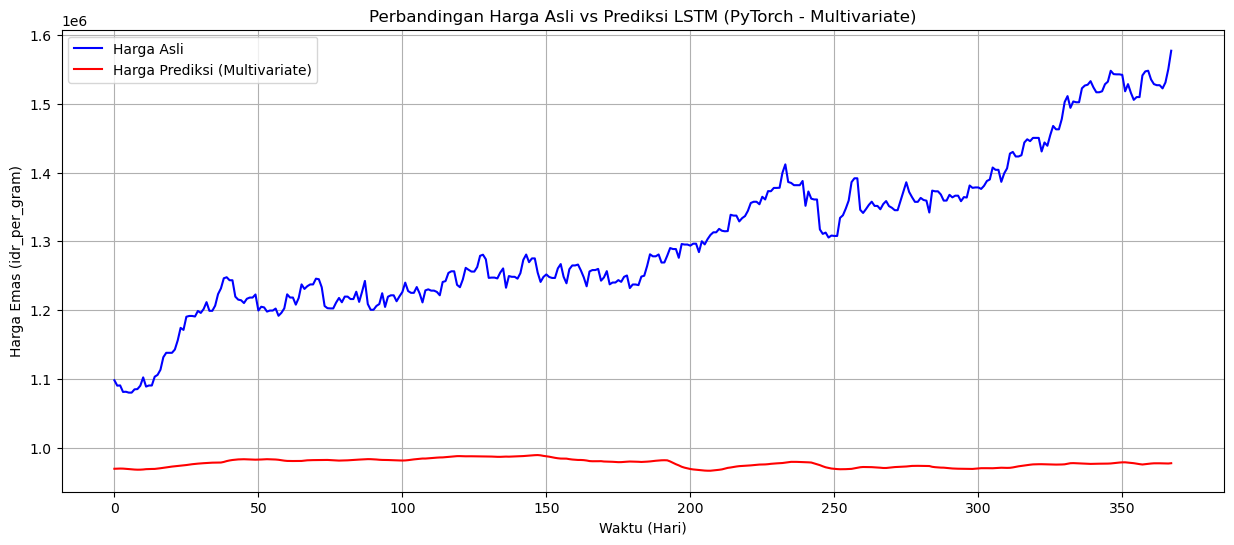

In [43]:
# --- 9. VISUALISASI HASIL ---
# Sama persis, ga ada yang diubah
plt.figure(figsize=(15, 6))
plt.plot(y_test_real, color='blue', label='Harga Asli')
plt.plot(test_predictions, color='red', label='Harga Prediksi (Multivariate)')
plt.title('Perbandingan Harga Asli vs Prediksi LSTM (PyTorch - Multivariate)')
plt.xlabel('Waktu (Hari)')
plt.ylabel('Harga Emas (idr_per_gram)')
plt.legend()
plt.grid(True)
plt.show()


--- Memulai forecasting untuk 90 hari ke depan... ---
--- Forecasting selesai! ---


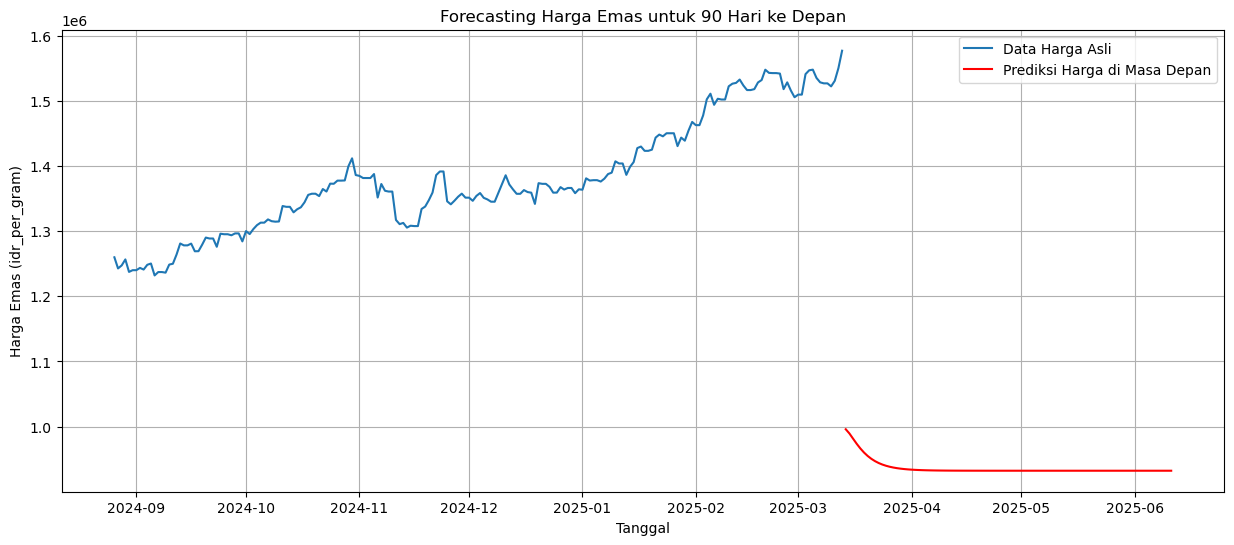

Contoh hasil prediksi:
2025-03-14: Rp 995,967.35
2025-03-15: Rp 989,486.46
2025-03-16: Rp 981,505.06
2025-03-17: Rp 973,602.08
2025-03-18: Rp 966,415.61


In [ ]:
#  --- 10. FORECASTING KE MASA DEPAN ---

# Ambil 60 hari terakhir dari seluruh dataset (sebelum di-split) sebagai input awal
last_60_days = scaled_data[-time_step:]
# Ubah jadi tensor dan tambahin dimensi batch
current_batch = torch.from_numpy(last_60_days).float().reshape(1, time_step, n_features)

# Siapin list buat nampung hasil forecast
future_predictions = []
n_future = 90 # Jumlah hari ke depan yang mau diprediksi

print(f"\n--- Memulai forecasting untuk {n_future} hari ke depan... ---")

model.eval() # Pastiin model dalam mode evaluasi
for i in range(n_future):
    with torch.no_grad():
        # Dapatkan prediksi untuk 1 hari ke depan
        next_prediction_scaled = model(current_batch)
        
        # Simpen hasil prediksi (yang masih scaled)
        future_predictions.append(next_prediction_scaled.item())
        
        # --- Update input batch buat prediksi hari selanjutnya ---
        # Bikin prediksi jadi format [1, 1, 1]
        new_pred_tensor = next_prediction_scaled.reshape(1, 1, 1)
        
        # Siapin fitur lain (kita asumsikan konstan, diambil dari hari terakhir)
        # Ambil nilai fitur lain dari timestep terakhir di current_batch
        other_features = current_batch[:, -1, 1:].reshape(1, 1, n_features - 1)
        
        # Gabungin prediksi harga emas dengan fitur-fitur lain
        new_row = torch.cat((new_pred_tensor, other_features), dim=2)
        
        # 'Geser' batch: buang data hari pertama, tambahin data prediksi baru di akhir
        current_batch = torch.cat((current_batch[:, 1:, :], new_row), dim=1)

# Balikin semua hasil prediksi ke skala Rupiah asli
# Kita pake trik 'dummy array' lagi
dummy_forecast = np.zeros((len(future_predictions), n_features))
dummy_forecast[:, 0] = future_predictions
forecast_real_values = scaler.inverse_transform(dummy_forecast)[:, 0]

print("--- Forecasting selesai! ---")

# Buat plotting, kita bikin index tanggalnya
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future)

# Plot hasilnya
plt.figure(figsize=(15, 6))
# Plot 200 hari terakhir data asli biar ada konteks
plt.plot(df.index[-200:], df['idr_per_gram'][-200:], label='Data Harga Asli')
# Plot hasil forecast
plt.plot(future_dates, forecast_real_values, color='red', label='Prediksi Harga di Masa Depan')
plt.title('Forecasting Harga Emas untuk 90 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas (idr_per_gram)')
plt.legend()
plt.grid(True)
plt.show()

# Tampilkan beberapa hasil prediksi
print("Contoh hasil prediksi:")
for i in range(20):
    print(f"{future_dates[i].date()}: Rp {forecast_real_values[i]:,.2f}")

In [41]:
# Tampilkan beberapa hasil prediksi
print("Contoh hasil prediksi:")
for i in range(20):
    print(f"{future_dates[i].date()}: Rp {forecast_real_values[i]:,.2f}")

Contoh hasil prediksi:
2025-03-14: Rp 995,967.35
2025-03-15: Rp 989,486.46
2025-03-16: Rp 981,505.06
2025-03-17: Rp 973,602.08
2025-03-18: Rp 966,415.61
2025-03-19: Rp 960,179.59
2025-03-20: Rp 954,921.01
2025-03-21: Rp 950,567.94
2025-03-22: Rp 947,007.94
2025-03-23: Rp 944,119.76
2025-03-24: Rp 941,788.52
2025-03-25: Rp 939,912.84
2025-03-26: Rp 938,406.38
2025-03-27: Rp 937,197.58
2025-03-28: Rp 936,227.93
2025-03-29: Rp 935,450.19
2025-03-30: Rp 934,826.22
2025-03-31: Rp 934,325.49
2025-04-01: Rp 933,923.56
2025-04-02: Rp 933,600.79


In [42]:
# Import library-nya (biasanya udah di paling atas, tapi pastiin lagi aja)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Pastiin lo udah punya variabel y_test_real dan test_predictions dari langkah sebelumnya

# --- 11. HITUNG METRIK FINAL ---

# Hitung MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_real, test_predictions)

# Hitung RMSE (Root Mean Squared Error)
# Kita hitung MSE dulu, baru diakarin
mse = mean_squared_error(y_test_real, test_predictions)
rmse = np.sqrt(mse)

print("\n--- Metrik Evaluasi Final ---")
print(f"Mean Absolute Error (MAE): Rp {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): Rp {rmse:,.2f}")


--- Metrik Evaluasi Final ---
Mean Absolute Error (MAE): Rp 326,887.95
Root Mean Squared Error (RMSE): Rp 345,670.29


training baru LSTM